# Assignment 6 - part B

## FOR PYTHON 2

## Behavior Dynamics in Social Networks - 2017

Read carefully the instructions, and run command by command making the changes asked along the notebook. 

---

**Step 0:** The line below imports all the libraries needed to run this code. If your library does not run, you can install it at the Anaconda interface, clicking in 'Environments'.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
import platform
 
print(platform.python_version())

2.7.12


## 1. Initial values for smoking behavior

**Step 1:** Take the data with the information about smoke behavior. The file is saved at the folder 'raw_data', and we want to make the first column (index_col=[0] the index of the frame we are creating.

a. Reads the csv file and considers the column 0 as the index for the table.

b. Replace all values that are 1 for 0.1 (inplace means that the changes are done automatically)

c. Replace all values that are 2 for 0.5

d. Replace all values that are 3 for 0.9

e. Show the head of the table (5 first rows)


In [3]:
tobacco = pd.read_csv('data/tobacco.csv', index_col=[0])
tobacco.replace(1,0.1,inplace=True)
tobacco.replace(2,0.5,inplace=True)
tobacco.replace(3,0.9,inplace=True)
tobacco.head(5)

,t1,t2,t3
s001,0.5,0.1,0.1
s002,0.1,0.1,0.1
s003,0.9,0.9,0.9
s004,0.1,0.1,0.1
s005,0.1,0.1,0.1


We convert the table's type to float. This change of the data type to float32 is needed to make it readable for gephi later.

**As you can see in the command below for the participant s048, we have some missing data (known as NaN in python). This is caused because the student wasn't present for the first questionaire, or maybe because the answer provided was invalid.**

In [4]:
tobacco = tobacco.astype(float)
tobacco.loc['s048']

t1    NaN
t2    0.1
t3    0.1
Name: s048, dtype: float64

To treat the NaNs we are going to make a list of all the nodes with NaN values. We make it for the three columns t1, t2 and t3.

In [5]:
# Get the list of nodes with nan values for tobacco
list_nans = list(tobacco[pd.isnull(tobacco['t1'])].index.values)
list_nans = list_nans + list(tobacco[pd.isnull(tobacco['t2'])].index.values)
list_nans = list_nans + list(tobacco[pd.isnull(tobacco['t3'])].index.values)

Now we are going to drop the nodes with missing data for the **first time point** only. As we need the initial values, we cannot have a node with this missing data.

Note: we are also creating a dictionary with the initial values for each node. The command *status_dict['s002']* shows the initial state for the node s002. The next command is to verify if the type of the variable is float.

In [6]:
status = tobacco.dropna()['t1']
status_temp = status.to_dict()
status_dict = {}
for key,value in status_temp.items():
    status_dict[key] = value

In [7]:
type(status_dict['s002'])

float

## 2. Loading the networks

* After starting the nodes and getting the initial value for the tobacco behavior, we need to generate the graph with the connections. 
* The first step is to read the raw data with the friendship levels and convert them to our model's format, normalizing it.

The file with the network is in the *friendship.1.csv* at the raw_data folder.

In [8]:
friendship1 = pd.read_csv('data/friendship.1.csv', index_col=[0])
friendship1.head()

,s001,s002,s003,s004,s005,s006,s007,s008,s009,s010,...,s151,s152,s153,s154,s155,s156,s157,s158,s159,s160
s001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10,10,10,10,0.0,10,10,10
s002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10,10,10,10,0.0,10,10,10
s003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10,10,10,10,0.0,10,10,10
s004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,10,10,10,10,0.0,10,10,10
s005,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,10,10,10,10,0.0,10,10,10


**Now we need to adjust the values (normalize) between 0 and 1. So for that, we will replace values 1 (best friend) for 0.9, 2 (friend) for 0.5, and so on.**

In [9]:
friendship1.replace(1, 0.9, inplace=True)
friendship1.replace(2, 0.5, inplace=True)
friendship1.replace(0, 0.1, inplace=True)
friendship1.replace(10, 0, inplace=True)
friendship1.head()

,s001,s002,s003,s004,s005,s006,s007,s008,s009,s010,...,s151,s152,s153,s154,s155,s156,s157,s158,s159,s160
s001,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0,0,0,0,0.1,0,0,0
s002,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0,0,0,0,0.1,0,0,0
s003,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0,0,0,0,0.1,0,0,0
s004,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.5,0.1,0.1,...,0.1,0.1,0,0,0,0,0.1,0,0,0
s005,0.1,0.1,0.1,0.1,0.1,0.5,0.1,0.1,0.1,0.5,...,0.1,0.1,0,0,0,0,0.1,0,0,0


In [10]:
print friendship1.loc['s001']['s002']
type(friendship1.loc['s001']['s002'])

0.1


numpy.float64

### Cleaning up the list of nans

We need to clean up the nodes that were removed before, without the first data point in the questionnaire. So for that we use the previously created vector *list_nans*.

In [11]:
network = friendship1.drop(list_nans).drop(list_nans, axis=1)

We will also make NaN values in the matrix become 0, as we don't know the relationship for these cells.

If you wanna see the network, uncomment the second row of the next box.

In [12]:
network = network.fillna(0)
#network

To see the size of our network, we run the following command. You should have a squared matrix of dimension 129. That means that we have 129 nodes left at the network after removing the nans.

In [13]:
network.shape

(129, 129)

### Creating the network for gephi

Now comes the best part! It is time to create the network. As you know, a graph is made of nodes and edges. This representation facilitates our understanding of how the network looks like. This also helps us to analyse the network using the tools that Gephi provides.

**We need to read the network data frame with the connections and make some adjustments.**

1. Convert the values on the network to float32 (Gephi does not accept float64).
2. Fill the diagonal with 0, as we do not have this information from the questionnaire.
3. We transposed the matrix network_ because the origin and target of the edges is inverted for our purposes

If you wanna see the result, uncomment the third row of the following box.

In [14]:
network_ = network.values
np.fill_diagonal(network_, 0)
g = nx.from_numpy_matrix(network_.T, create_using=nx.MultiDiGraph())
type(network_[0][0])

numpy.float64

**Time to initiate the values for the nodes. We will create an attribute for each node called activityTimeLine. This attribute contains the value of the opinion of the node per time step. So at the end of the simulation, this is where we are gonna find this information.**

In [15]:
# Save the old values for checking
old_labels = list(g.nodes())
dict_attributes = dict(zip(old_labels, old_labels))

dictlist = [dict() for x in range(len(old_labels))]
dictActivityTimeLine = dict(zip(old_labels, dictlist))
nx.set_node_attributes(g, dict_attributes, 'old_id')
nx.set_node_attributes(g, dictActivityTimeLine, 'activityTimeLine')

In [16]:
dict_attributes

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 106: 106,
 107: 107,
 108: 108,
 109: 109,
 110: 110,

Our graph is called g in this code. You can see the list of nodes (you have to uncomment) and the attributes of a node as show below.

In [17]:
#g.nodes()
g.node[4]

{'activityTimeLine': {}, 'old_id': 4}

As the numbers are not so intuitive, we will change the names of the nodes according to the data set provided.

In [18]:
relabel_dict = dict(zip(old_labels, network.columns.values))
g = nx.relabel_nodes(g, relabel_dict)

So now, if you try to see node 4, it does not exist anymore, because its name was changed.

In [19]:
# Should yield an error
g.node[4]

KeyError: 4

In [ ]:
print 'List of nodes: \n', g.nodes()
print '\nInformation of node s005: ', g.node['s005']

### Initiate the states!
Now we are going to put the initial state for each node as an attribute called *'state'*. Notice that the activityTimeLine created before will receive its first value, for time 0. 

In [20]:
nx.set_node_attributes(g, status_dict, 'state')

In [21]:
for node in g.nodes():
    state_node = float(g.node[node]['state'])
    g.node[node]['activityTimeLine'].update({0:state_node})

You can check what is the initial state for node s003 below!

In [22]:
print g.node['s003']
print type(g.node['s003']['state'])

{'activityTimeLine': {0: 0.9}, 'state': 0.9, 'old_id': 2}
<type 'float'>


#### Edges

**As the nodes are ready to fly, we have to set up the edges also. Remember that our goal in this assignment is to also see the changes in the edges according to the homophily principle.**

So for that we will get the weights from the table provided and transformed, and we will create an attribute for each edge called 'weightTimeLine'. This attribute will contain information about the value of the weight of each edge over time.

In [23]:
for source, target in g.edges():
    g[source][target][0].update(weightTimeLine={0:g.get_edge_data(source,target)[0]['weight']})

**To see the attributes of an edge, call the function get_edge_data with the source and targe as parameters.**

In [24]:
print g.get_edge_data('s006','s002')
print type(g.get_edge_data('s006','s002')[0]['weightTimeLine'][0])

{0: {'weight': 0.1, 'weightTimeLine': {0: 0.1}}}
<type 'float'>


### STEP 2: Set up

Setting up the initial values for time, number of agents

In [25]:
time = 10
delta = 0.3
speed_factor = 0.6

## Updating the values of edges and states over time

The next imports and boxes are the running of the code for updating the values. Observe that this running is based on the temporal-causal model for the states and in the homophily principle, that can be moduled in many different ways.

In [26]:
import py2.edges_update as eu
import py2.states_update as su

**The following box is to reload the codes for the functions of edges_update and states_update. Uncomment it if you need to make any change at this files and run the functions again.**

In [27]:
#reload(eu)
#reload(su)

The functions for edges_update and states_update receive some parameters that are important to understand.

### edges_update

* **function:** this is the function that will rule the change on the states. The function slhom (simple linear homophily) needs the amplification factor as input. 
* **speed_factor:** is defined above. 
* **thres_h:** this is the threshold for the homophily calculation.
* **delta:** is the delta t used to change the time scale for your simulation
* **amplification:** factor used at the simple linear homophily model, as shown in classroom

### states_update

* **combination_function:** the function that will rule the changes at the states. Here you receive the 'adnorsum' combination function. This function does not need any additional parameter.
* **speed_factor:** same above.
* **delta:** same above.

In [28]:
g_old = g.copy()
nx.write_gexf(g, 'initial_graph.gexf')

for t in range(1,time):
    g_temp = eu.edges_update(g_old, t, function='slhom', speed_factor=speed_factor, thres_h=0.2, 
                             amplification=10, delta=delta)
    g_new = su.states_update(g_temp, t, combination_function='adnorsum', speed_factor=speed_factor, 
                             delta=delta)
    g_old = g_new.copy()
    
nx.write_gexf(g_new, 'final_graph.gexf')


Time:  5


In [29]:
g_new.get_edge_data('s070', 's071')

{0: {'weight': 0.7081802460837276,
  'weightTimeLine': {0: 0.1,
   1: 0.13240000000000002,
   2: 0.17375328640000001,
   3: 0.22542988052638724,
   4: 0.28827641311990315,
   5: 0.36211916097640662,
   6: 0.44525205645378352,
   7: 0.53414927848138505,
   8: 0.62370765479216006,
   9: 0.70818024608372765}}}

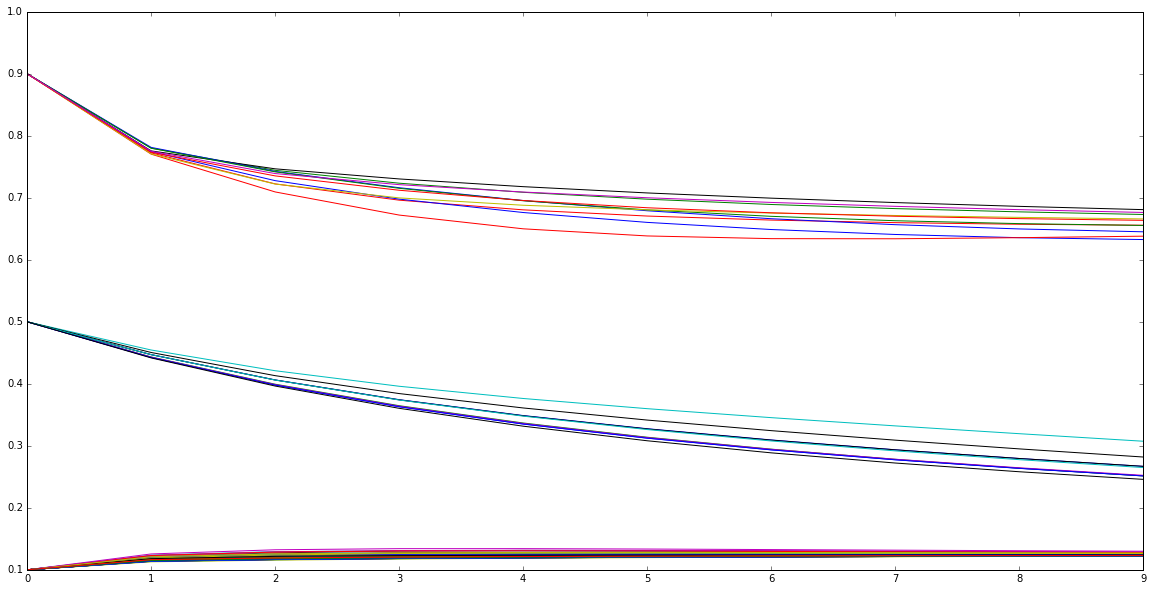

In [30]:
plt.figure(figsize=(20,10))
for node in g_new.nodes():
    state_tuples = g_new.node[node]['activityTimeLine'].items()
    plt.plot(*zip(*state_tuples))
    #plt.show()

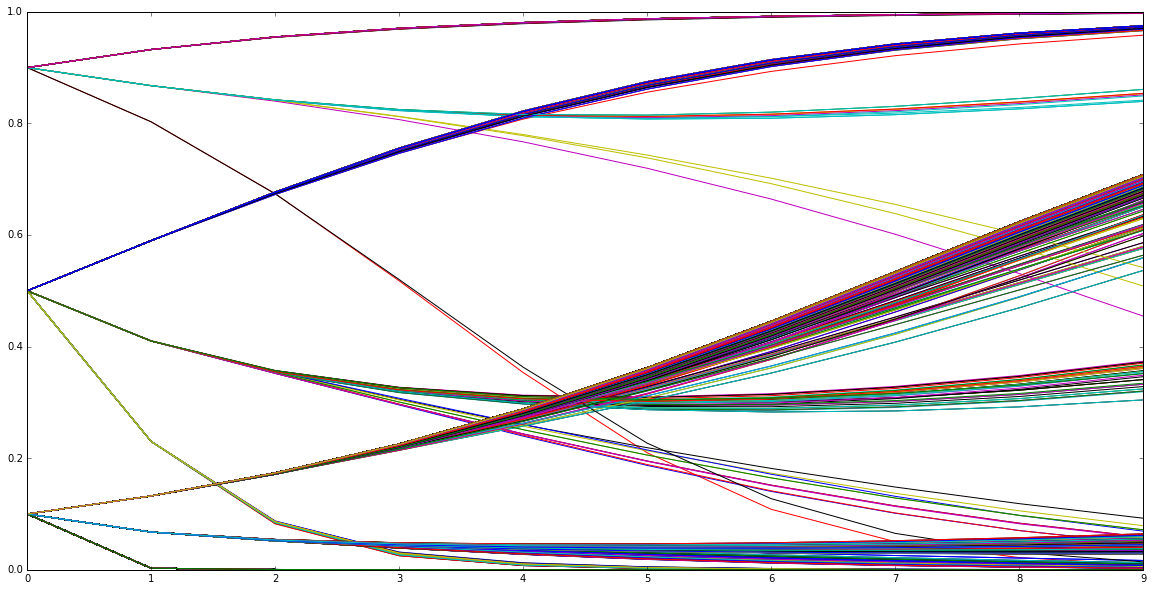

In [31]:
plt.figure(figsize=(20,10))
for edge in g_new.edges():
    source, target = edge
    state_tuples = g_new[source][target][0]['weightTimeLine'].items()# node[node]['activityTimeLine'].items()
    plt.plot(*zip(*state_tuples))
    #plt.show()